# Exploratory Data Analysis on a Loans data of a Private Financial Firm.

## Importing all the necessary modules

In [435]:
import numpy as np                      # for the 2-d matrices
import pandas as pd                     # for the data frames
import matplotlib.pyplot as plt         # for data vizualizations 
import datetime as dt                   # for the datetime data
import seaborn as sns                   # for the visualizations 

## Importing the data from an external source into the Python environment

In [436]:
data= pd.read_csv('LoansData (1).csv')
data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [437]:
data.shape

(2500, 15)

**There are 2500 records for 15 variables**

## EDA: Exploratory Data Analysis

### Renaming the variables as per the Naming conversion.

In [438]:
data.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [440]:
data.iloc[1:4,]

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years


In [441]:
                 #Checking the shape of the data
data.shape       #There are 2500 records and 15 variables available in the data.

(2500, 15)

In [442]:
data.head(2)

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [443]:
data.columns = [i.replace('.','_') for i in data.columns]
data.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

### Performing necessary Datatype Conversions on the data.

In [444]:
data['Debt_To_Income_Ratio']= data['Debt_To_Income_Ratio'].str.replace('%','').astype('float')

In [445]:
data['Employment_Length'] = data['Employment_Length'].str.replace('years','').str.replace('year','').str.replace('<','').str.replace('+','').astype('float')

In [446]:
data['Interest_Rate'] = data['Interest_Rate'].str.replace('%','').astype('float')

In [447]:
data['Loan_Length'] = data['Loan_Length'].str.replace('months','').astype('float')

In [448]:
data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0


In [449]:
data['FICO_Range'] = data['FICO_Range'].str.split('-',expand = True)[0].astype('float')

In [450]:
data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695.0,11.0,14469.0,0.0,9.0


## Checking the relevant and irrelevant variables in the first phase of EDA

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount_Requested                2499 non-null   float64
 2   Amount_Funded_By_Investors      2499 non-null   float64
 3   Interest_Rate                   2498 non-null   float64
 4   Loan_Length                     2500 non-null   float64
 5   Loan_Purpose                    2500 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   float64
 7   State                           2500 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2499 non-null   float64
 10  FICO_Range                      2498 non-null   float64
 11  Open_CREDIT_Lines               2497 non-null   float64
 12  Revolving_CREDIT_Balance        24

In [452]:
data.nunique()           # we will get cardinality of each column
                         # If there is any column with a cardinality of 1, Just drop it.
                         # data.drop(columns = ['Country','Pincode'], inplace  = True)

LoanID                            2500
Amount_Requested                   380
Amount_Funded_By_Investors         710
Interest_Rate                      275
Loan_Length                          2
Loan_Purpose                        14
Debt_To_Income_Ratio              1669
State                               46
Home_Ownership                       5
Monthly_Income                     632
FICO_Range                          38
Open_CREDIT_Lines                   29
Revolving_CREDIT_Balance          2349
Inquiries_in_the_Last_6_Months      10
Employment_Length                   10
dtype: int64

In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount_Requested                2499 non-null   float64
 2   Amount_Funded_By_Investors      2499 non-null   float64
 3   Interest_Rate                   2498 non-null   float64
 4   Loan_Length                     2500 non-null   float64
 5   Loan_Purpose                    2500 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   float64
 7   State                           2500 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2499 non-null   float64
 10  FICO_Range                      2498 non-null   float64
 11  Open_CREDIT_Lines               2497 non-null   float64
 12  Revolving_CREDIT_Balance        24

In [454]:
data['Loan_Length'].value_counts()            #Always checks the value counts of object variable.

Loan_Length
36.0    1952
60.0     548
Name: count, dtype: int64

### Distribution of customers by loan lengths

Loan_Length
36.0    1952
60.0     548
Name: count, dtype: int64


Text(0, 0.5, 'No of customers')

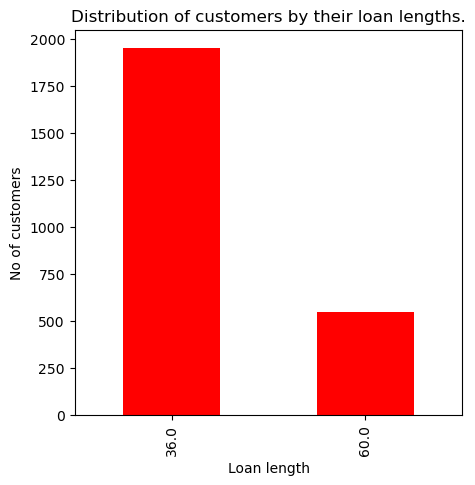

In [455]:
print(data['Loan_Length'].value_counts())
data['Loan_Length'].value_counts().plot(kind = 'bar',color = 'red',figsize = (5,5))
plt.title("Distribution of customers by their loan lengths.")
plt.xlabel("Loan length")
plt.ylabel("No of customers")

**Most of the customers are choose the loan length of 36.0.**

### Distribution of customers by State

State
CA    433
NY    255
TX    174
FL    169
IL    101
GA     98
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
MN     38
AL     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     15
NM     13
AR     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
IA      1
MS      1
Name: count, dtype: int64


Text(0, 0.5, 'No of customers')

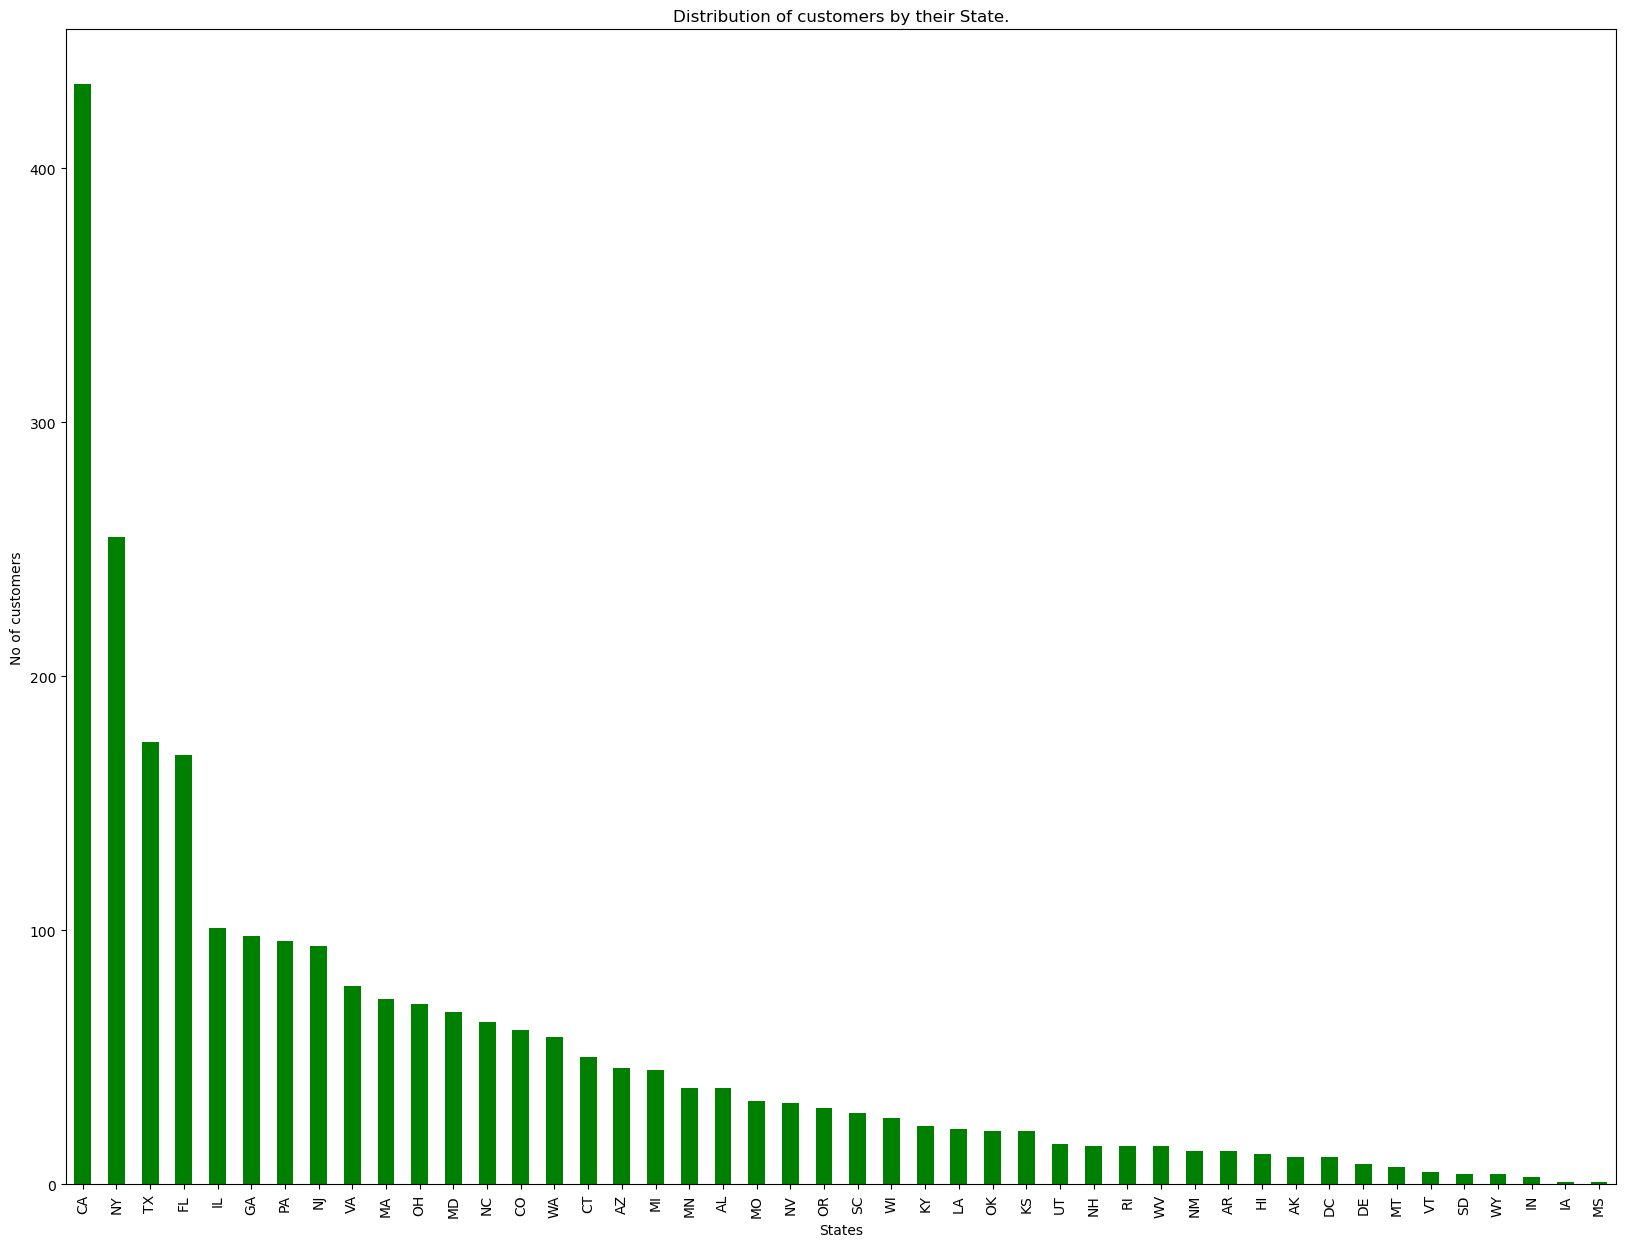

In [456]:
print(data['State'].value_counts())
data['State'].value_counts().plot(kind = 'bar',color = 'green',figsize = (20,15))
plt.title("Distribution of customers by their State.")
plt.xlabel("States")
plt.ylabel("No of customers")

**State CA have most number of customers above 300.**

### Distribution of customers by loan purpose

Loan_Purpose
debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: count, dtype: int64


Text(0, 0.5, 'No of customers')

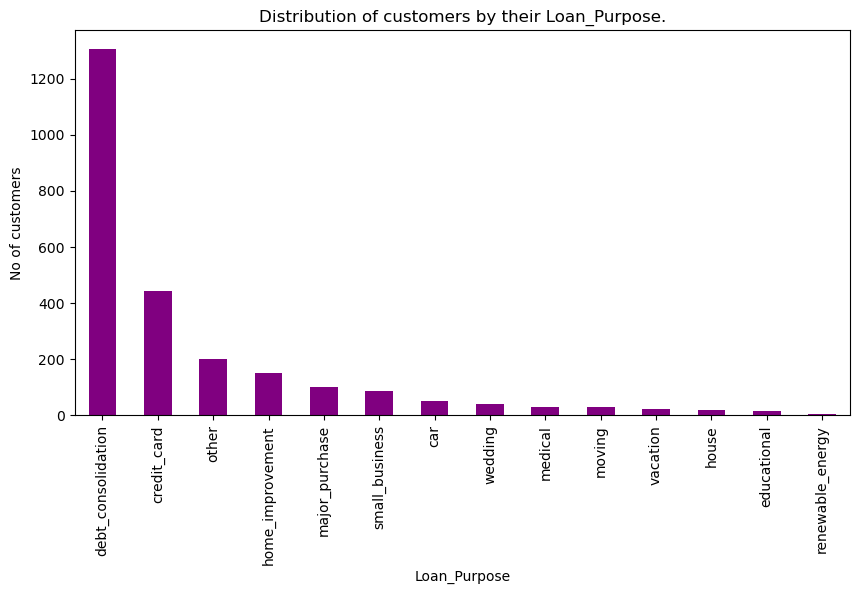

In [457]:
print(data['Loan_Purpose'].value_counts())
data['Loan_Purpose'].value_counts().plot(kind = 'bar',color = 'purple',figsize = (10,5))
plt.title("Distribution of customers by their Loan_Purpose.")
plt.xlabel("Loan_Purpose")
plt.ylabel("No of customers")

**Most of the customers purpose of loan is debt_consolidation.**

### Distribution of customers by Home ownership

Home_Ownership
MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: count, dtype: int64


Text(0, 0.5, 'No of customers')

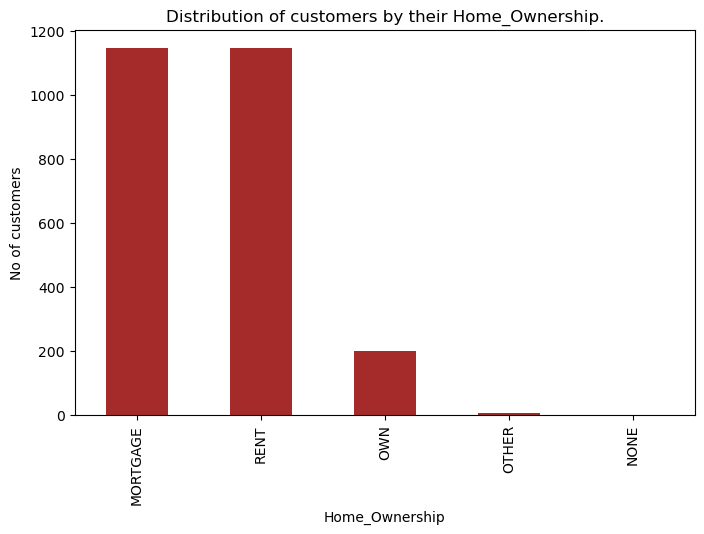

In [458]:
print(data['Home_Ownership'].value_counts())
data['Home_Ownership'].value_counts().plot(kind = 'bar',color = 'brown',figsize = (8,5))
plt.title("Distribution of customers by their Home_Ownership.")
plt.xlabel("Home_Ownership")
plt.ylabel("No of customers")

**1147 customers are mortgage loans to owner the home and rent home ownership is 1146. Most of the customers are having these two ownerships .**

### Distribution of Employment.Length by their loan lengths

Loan_Length
36.0    1952
60.0     548
Name: count, dtype: int64


Text(0, 0.5, 'Employment.Length')

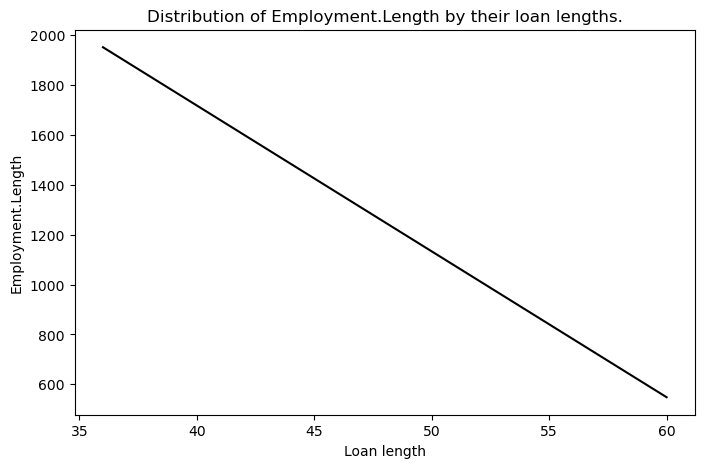

In [459]:
print(data['Loan_Length'].value_counts())
data['Loan_Length'].value_counts().plot(kind = 'line',color = 'black',figsize = (8,5))
plt.title("Distribution of Employment.Length by their loan lengths.")
plt.xlabel("Loan length")
plt.ylabel("Employment.Length")

**Here the Employment Length increase then the loan length decreases.**

### Amount requested vs Interest Rate

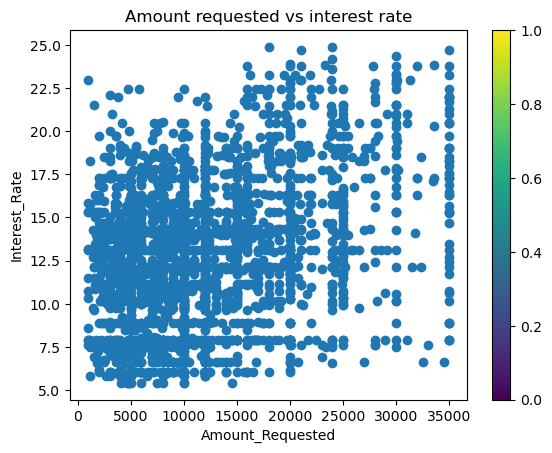

In [461]:

plt.scatter(data['Amount_Requested'],data['Interest_Rate'])
plt.title("Amount requested vs interest rate")
plt.xlabel('Amount_Requested')
plt.ylabel('Interest_Rate')
plt.colorbar()
plt.show()

**Most of the customers requested amount upto 15000 and mostly fetches the interest rate between 7.5 and 17.5.**

### Histograms

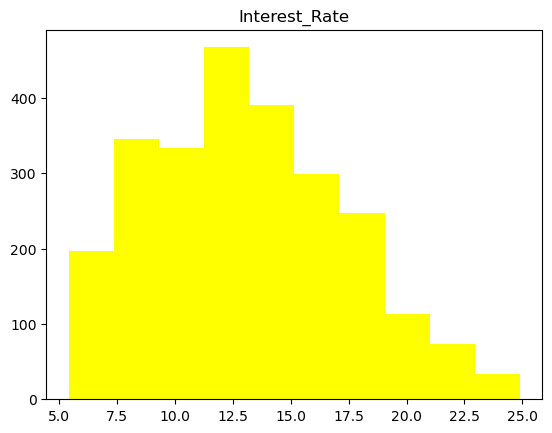

In [462]:
plt.hist(data['Interest_Rate'],color='yellow')
plt.title('Interest_Rate')
plt.show()

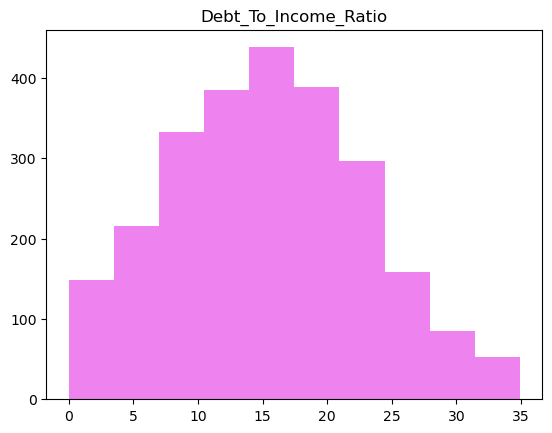

In [463]:
plt.hist(data['Debt_To_Income_Ratio'],color='violet')
plt.title('Debt_To_Income_Ratio')
plt.show()

## Data Duplicacy: Chech if their is duplicate data or not: DDT ( Data Duplicacy Treatment)

In [464]:
data.duplicated().value_counts()                 # Check the data duplicacy:

False    2500
Name: count, dtype: int64

In [465]:
data.duplicated().sum()

0

**There is no data duplicacy in our data**

## Rename the variables

In [466]:
data.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [467]:
data = data.rename(columns = {'LoanID':'Loan_id','State':'States'})
data.columns

Index(['Loan_id', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'States', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

## Missing Values Treatment

In [468]:
data.head()

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,States,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695.0,11.0,14469.0,0.0,9.0


In [469]:
data.Amount_Requested.isna().sum()  

1

In [470]:
data.shape

(2500, 15)

In [471]:
data.isna().sum()

Loan_id                            0
Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
States                             0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

**We have the maximum of 3% values missing in the Employment length variable.**

**Creating a UDF which can automate the missing value treatment.**

In [472]:
data.shape

(2500, 15)

In [473]:
data.columns

Index(['Loan_id', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'States', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [474]:
def miss_value_treat(s):
    if s.dtype == 'O':
        s = s.fillna(s.mode())
    else:
        s = s.fillna(s.median())
    return s
    

In [475]:
data = data.apply(miss_value_treat)

In [476]:
data.isna().sum()

Loan_id                           0
Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
States                            0
Home_Ownership                    1
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [477]:
data['Amount_Requested'] = data.Amount_Requested.fillna(data['Amount_Requested'].median())

In [478]:
data['Amount_Funded_By_Investors'] = data.Amount_Funded_By_Investors.fillna(data['Amount_Funded_By_Investors'].median())

In [479]:
data.isna().sum()

Loan_id                           0
Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
States                            0
Home_Ownership                    1
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Loan_id                         2500 non-null   int64  
 1   Amount_Requested                2500 non-null   float64
 2   Amount_Funded_By_Investors      2500 non-null   float64
 3   Interest_Rate                   2500 non-null   float64
 4   Loan_Length                     2500 non-null   float64
 5   Loan_Purpose                    2500 non-null   object 
 6   Debt_To_Income_Ratio            2500 non-null   float64
 7   States                          2500 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2500 non-null   float64
 10  FICO_Range                      2500 non-null   float64
 11  Open_CREDIT_Lines               2500 non-null   float64
 12  Revolving_CREDIT_Balance        25

In [481]:
data.columns

Index(['Loan_id', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'States', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

## Separating the categorical Variables and Numerical variables into two different datasets for Data Preparations for Data Analysis.

In [482]:
categorical = [var for var in data.columns if data[var].dtype == 'O']
categorical

['Loan_Purpose', 'States', 'Home_Ownership']

In [483]:
cat_data = data[categorical]

In [484]:
cat_data['Loan_id'] = data['Loan_id']

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_15404\1913625421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Loan_id'] = data['Loan_id']


In [485]:
cat_data.head()

,Loan_Purpose,States,Home_Ownership,Loan_id
0,debt_consolidation,SC,MORTGAGE,1
1,debt_consolidation,TX,MORTGAGE,2
2,debt_consolidation,CA,MORTGAGE,3
3,debt_consolidation,KS,MORTGAGE,4
4,credit_card,NJ,RENT,5


In [486]:
cat_data.shape

(2500, 4)

In [487]:
numerical = [var for var in data.columns if data[var].dtype != 'O']

In [488]:
num_data = data[numerical]
num_data.head()

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0


## Filling missing values in Numerical data with the Median values.

In [489]:
for i in num_data.columns:
        num_data[i] = num_data[i].fillna(num_data[i].median())

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_15404\3523660906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].fillna(num_data[i].median())


In [490]:
num_data.isna().sum()

Loan_id                           0
Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Debt_To_Income_Ratio              0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

## Filling missing values in Categorical data with the Mode values.

In [491]:
for i in cat_data.columns:
        cat_data[i] = cat_data[i].fillna(cat_data[i].mode())

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_15404\2803963677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = cat_data[i].fillna(cat_data[i].mode())


In [492]:
cat_data.isna().sum()

Loan_Purpose      0
States            0
Home_Ownership    1
Loan_id           0
dtype: int64

In [493]:
cat_data.Home_Ownership.count()

2499

In [494]:
cat_data.Home_Ownership.value_counts()

Home_Ownership
MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: count, dtype: int64

In [495]:
cat_data.loc[cat_data['Home_Ownership'] == None]

,Loan_Purpose,States,Home_Ownership,Loan_id


In [496]:
s = pd.Series(cat_data.Home_Ownership.isna())
s[s == True]

2492    True
Name: Home_Ownership, dtype: bool

In [497]:
cat_data.loc[2492,]

Loan_Purpose      debt_consolidation
States                            NJ
Home_Ownership                   NaN
Loan_id                         2493
Name: 2492, dtype: object

In [498]:
cat_data['Home_Ownership']  = cat_data['Home_Ownership'].replace("NaN",None)

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_15404\2801747167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Home_Ownership']  = cat_data['Home_Ownership'].replace("NaN",None)


In [499]:
cat_data.Home_Ownership.value_counts()

Home_Ownership
MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: count, dtype: int64

In [500]:
cat_data.isna().sum()

Loan_Purpose      0
States            0
Home_Ownership    1
Loan_id           0
dtype: int64

In [501]:
cat_data.tail(10)

,Loan_Purpose,States,Home_Ownership,Loan_id
2490,debt_consolidation,CA,RENT,2491
2491,debt_consolidation,CA,RENT,2492
2492,debt_consolidation,NJ,NaN,2493
2493,other,IL,MORTGAGE,2494
2494,debt_consolidation,WA,MORTGAGE,2495
2495,debt_consolidation,NY,MORTGAGE,2496
2496,home_improvement,MD,OWN,2497
2497,debt_consolidation,PA,MORTGAGE,2498
2498,major_purchase,NJ,RENT,2499
2499,debt_consolidation,NY,RENT,2500


In [502]:
cat_data = cat_data.drop(2492)

In [503]:
cat_data.tail(10)

,Loan_Purpose,States,Home_Ownership,Loan_id
2489,debt_consolidation,NY,RENT,2490
2490,debt_consolidation,CA,RENT,2491
2491,debt_consolidation,CA,RENT,2492
2493,other,IL,MORTGAGE,2494
2494,debt_consolidation,WA,MORTGAGE,2495
2495,debt_consolidation,NY,MORTGAGE,2496
2496,home_improvement,MD,OWN,2497
2497,debt_consolidation,PA,MORTGAGE,2498
2498,major_purchase,NJ,RENT,2499
2499,debt_consolidation,NY,RENT,2500


In [504]:
cat_data.isna().sum()

Loan_Purpose      0
States            0
Home_Ownership    0
Loan_id           0
dtype: int64

In [505]:
cat_data.shape

(2499, 4)

In [506]:
num_data = num_data.drop(2492)

In [507]:
num_data.shape

(2499, 12)

In [508]:
# fOR MERGING THE TWO DATASETS , There should be a common column.

In [509]:
cat_data.head(2)

,Loan_Purpose,States,Home_Ownership,Loan_id
0,debt_consolidation,SC,MORTGAGE,1
1,debt_consolidation,TX,MORTGAGE,2


In [510]:
num_data.head(2)

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0


## Outlier Treatment

In [511]:
num_data.head()   

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0


## observing a single column for the outliers

In [512]:
num_data.describe()

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
count,2499.000000,2499.000000,2499.00000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.00000
mean,1250.002801,12406.902761,12003.83477,13.066619,41.262905,15.380420,5688.864626,705.898359,10.073629,15221.817127,0.905162,5.47499
std,721.548325,7802.156772,7746.04527,4.175938,9.932322,7.505052,3963.128380,35.035486,4.504621,18273.326539,1.230862,3.38905
min,1.000000,1000.000000,-0.01000,5.420000,36.000000,0.000000,588.500000,640.000000,2.000000,0.000000,0.000000,1.00000
25%,625.500000,6000.000000,6000.00000,10.160000,36.000000,9.750000,3500.000000,680.000000,7.000000,5587.500000,0.000000,2.00000
50%,1250.000000,10000.000000,10000.00000,13.110000,36.000000,15.320000,5000.000000,700.000000,9.000000,10948.000000,0.000000,5.00000
75%,1874.500000,17000.000000,16000.00000,15.800000,36.000000,20.675000,6800.000000,725.000000,13.000000,18849.500000,1.000000,10.00000
max,2500.000000,35000.000000,35000.00000,24.890000,60.000000,34.910000,102750.000000,830.000000,38.000000,270800.000000,9.000000,10.00000


In [513]:
 min_Amt = num_data.Amount_Requested.min()
min_Amt

1000.0

In [514]:
max_Amt = num_data.Amount_Requested.max()
max_Amt

35000.0

**quantile() helps to find the percentile vaues at each percentile mark.**

In [515]:
median = num_data.Amount_Requested.quantile(0.5)
median

10000.0

In [516]:
f_q = num_data.Amount_Requested.quantile(0.25)
t_q = num_data.Amount_Requested.quantile(0.75)
p_1 = num_data.Amount_Requested.quantile(0.01)
p_99 = num_data.Amount_Requested.quantile(0.99)

In [517]:
print("First quartile:",f_q)
print("Third quartile:",t_q)
print("Bottom 1%ile cutoff:",p_1)
print("Top 1%ile cutoff:",p_99)

First quartile: 6000.0
Third quartile: 17000.0
Bottom 1%ile cutoff: 1500.0
Top 1%ile cutoff: 35000.0


In [518]:
#iqr = q3 - q1
iqr = 17000 - 6000
iqr

11000

In [519]:
#lc = q1 - 1.5*iqr
#uc = q3 + 1.5*iqr

In [520]:
lc = 6000 - (1.5*iqr)
lc

-10500.0

In [521]:
uc = 17000 + (1.5*iqr)
uc

33500.0

<Axes: >

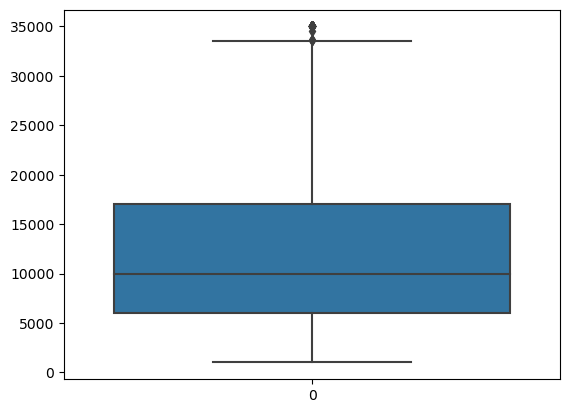

In [522]:
sns.boxplot(num_data.Amount_Requested)

In [523]:
num_data.head()

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0


In [524]:
num_data.Loan_Length.nunique()

2

In [525]:
num_data.Loan_Length.value_counts()

Loan_Length
36.0    1951
60.0     548
Name: count, dtype: int64

In [526]:
num_data.columns

Index(['Loan_id', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Debt_To_Income_Ratio',
       'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [527]:
num_data.Inquiries_in_the_Last_6_Months.value_counts()

Inquiries_in_the_Last_6_Months
0.0    1252
1.0     657
2.0     335
3.0     169
4.0      50
5.0      14
6.0       8
7.0       7
9.0       5
8.0       2
Name: count, dtype: int64

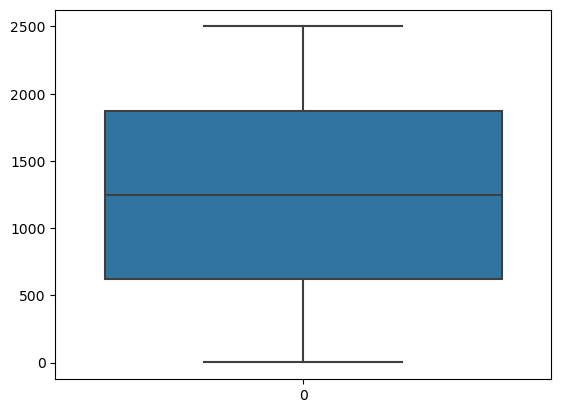

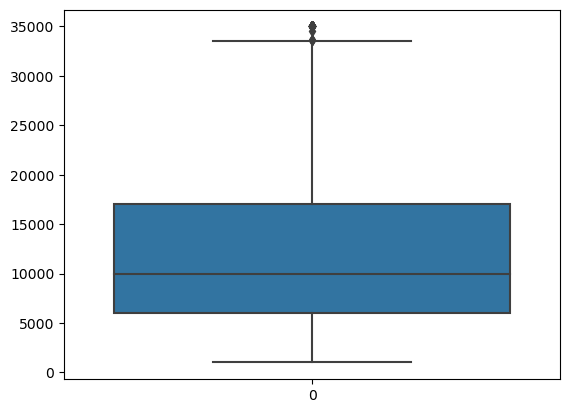

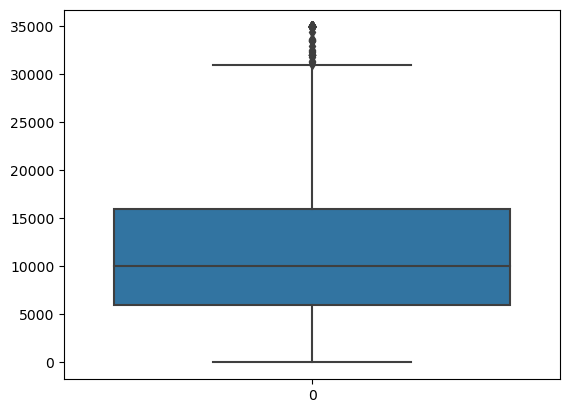

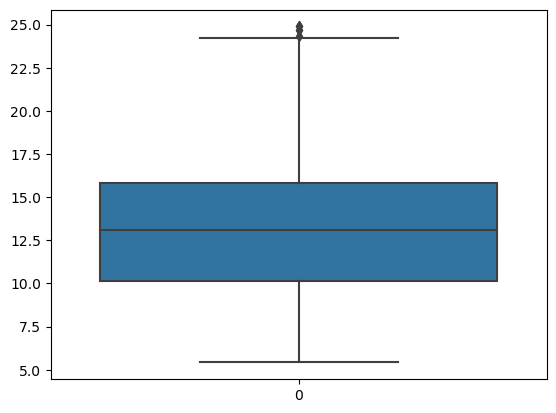

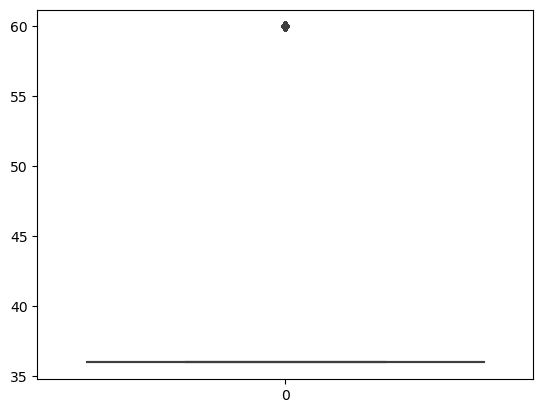

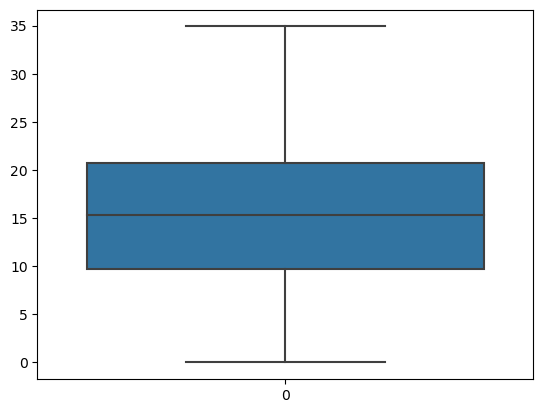

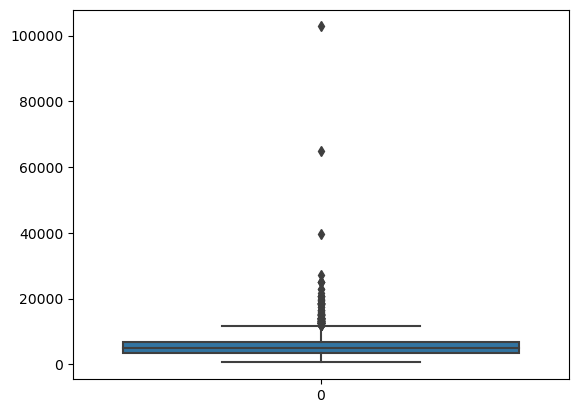

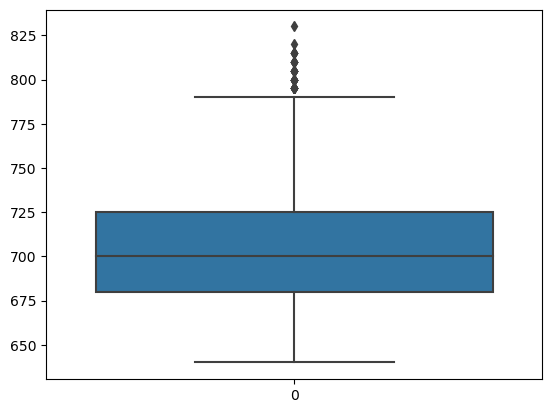

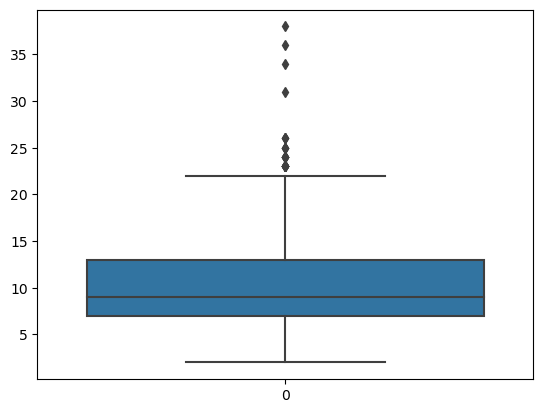

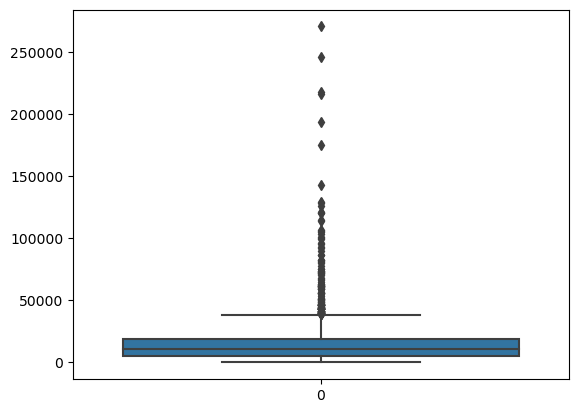

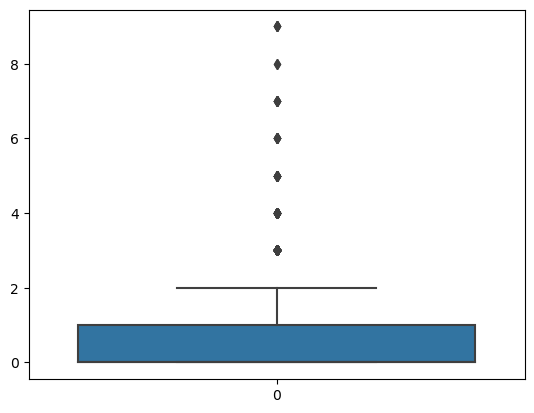

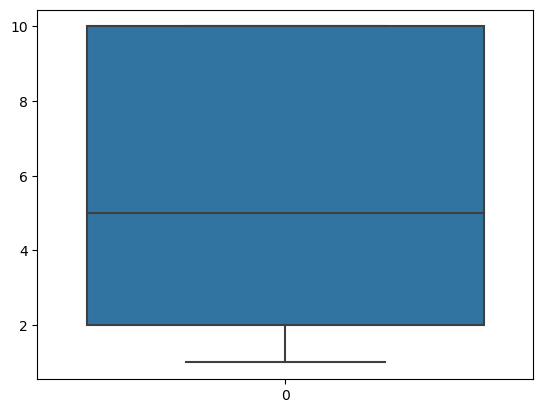

In [528]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

In [529]:
num_data.head() 

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0


In [530]:
lc

-10500.0

In [531]:
uc

33500.0

In [532]:
#Outliers have been clipped.
num_data['Amount_Requested'] = num_data.Amount_Requested.clip(lower = lc, upper = uc)

<Axes: >

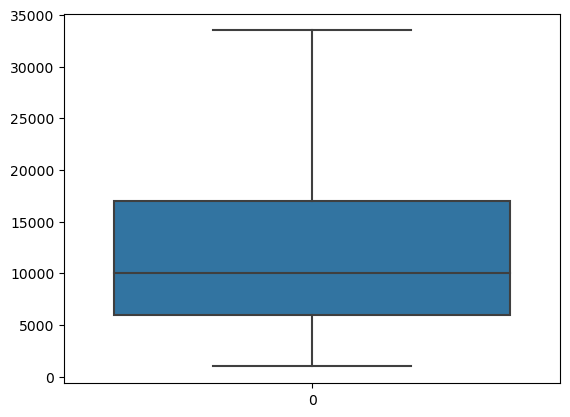

In [533]:
sns.boxplot(num_data.Amount_Requested)

<Axes: >

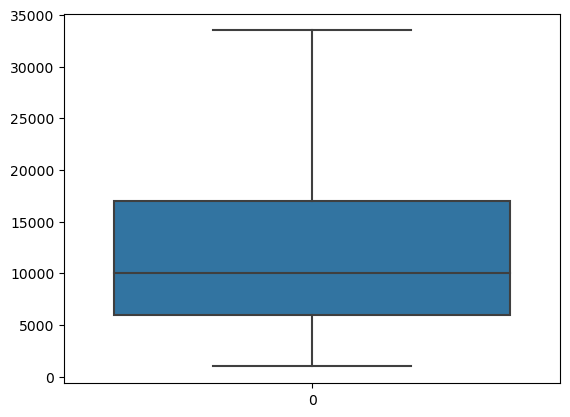

In [534]:
sns.boxplot(num_data.Amount_Requested)

In [535]:
num_data.columns

Index(['Loan_id', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Debt_To_Income_Ratio',
       'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

<Axes: >

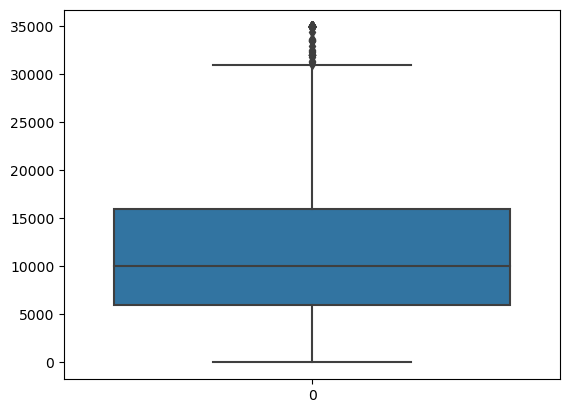

In [536]:
sns.boxplot(num_data.Amount_Funded_By_Investors)

In [537]:
num_data['Amount_Requested'] = num_data.Amount_Funded_By_Investors.clip(lower = lc, upper = uc)

## Outlier treatment IQR Method

In [538]:
def outlier_IQR(s):
    m = s.quantile(0.5)
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    q_1p = s.quantile(0.01)
    q_99p = s.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    result = pd.Series([m,q1,q3,q_1p,q_99p,iqr,lc,uc])
    result.index = ['median','first_quartile','third_quartile','pc_1','pc_99','iqr','lower_cutoff','upper_cutoff']
    return result

In [539]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [540]:
num_data.apply(outliertreat_IQR)

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,-1248.0,-9000.0,-9000.0,1.70,36.0,-6.6375,-1450.0,612.5,-2.0,-14305.5,-1.5,-10.0
1,3748.0,31000.0,31000.0,24.26,36.0,37.0625,11750.0,792.5,22.0,38742.5,2.5,22.0


In [541]:
num_data.apply(outlier_IQR)

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
median,1250.00,10000.0000,10000.0000,13.1100,36.0,15.3200,5000.0000,700.0,9.0,10948.00,0.0,5.0
first_quartile,625.50,6000.0000,6000.0000,10.1600,36.0,9.7500,3500.0000,680.0,7.0,5587.50,0.0,2.0
third_quartile,1874.50,16000.0000,16000.0000,15.8000,36.0,20.6750,6800.0000,725.0,13.0,18849.50,1.0,10.0
pc_1,25.98,998.3456,998.3456,5.9860,36.0,0.7180,1416.4032,660.0,3.0,0.00,0.0,1.0
pc_99,2474.02,33500.0000,35000.0000,22.9566,60.0,33.2300,18750.0000,805.0,23.0,92416.32,5.0,10.0
iqr,1249.00,10000.0000,10000.0000,5.6400,0.0,10.9250,3300.0000,45.0,6.0,13262.00,1.0,8.0
lower_cutoff,-1248.00,-9000.0000,-9000.0000,1.7000,36.0,-6.6375,-1450.0000,612.5,-2.0,-14305.50,-1.5,-10.0
upper_cutoff,3748.00,31000.0000,31000.0000,24.2600,36.0,37.0625,11750.0000,792.5,22.0,38742.50,2.5,22.0


In [542]:
cutoffs = pd.DataFrame(num_data.apply(outliertreat_IQR))
cutoffs

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,-1248.0,-9000.0,-9000.0,1.70,36.0,-6.6375,-1450.0,612.5,-2.0,-14305.5,-1.5,-10.0
1,3748.0,31000.0,31000.0,24.26,36.0,37.0625,11750.0,792.5,22.0,38742.5,2.5,22.0


## Outlier treatment of only required columns

In [543]:
num_data.columns

Index(['Loan_id', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Debt_To_Income_Ratio',
       'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

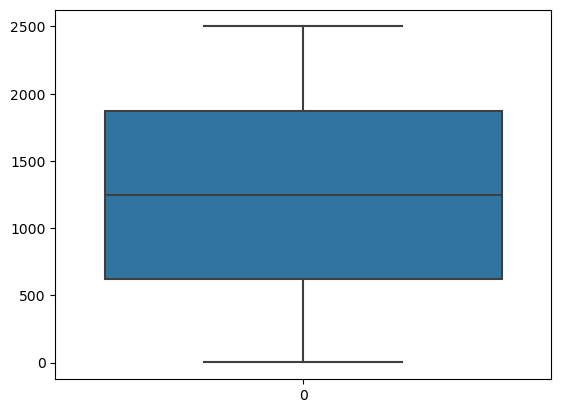

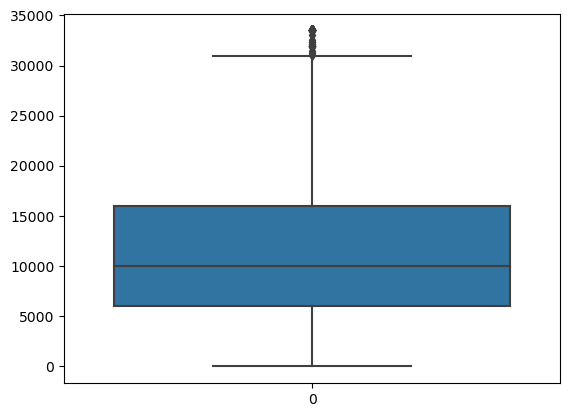

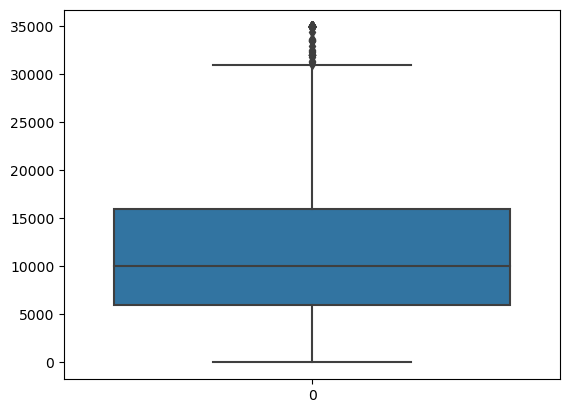

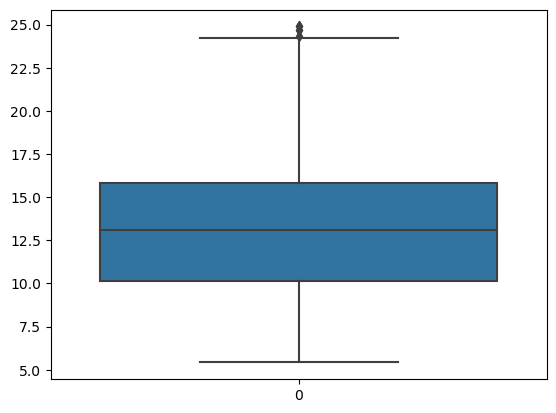

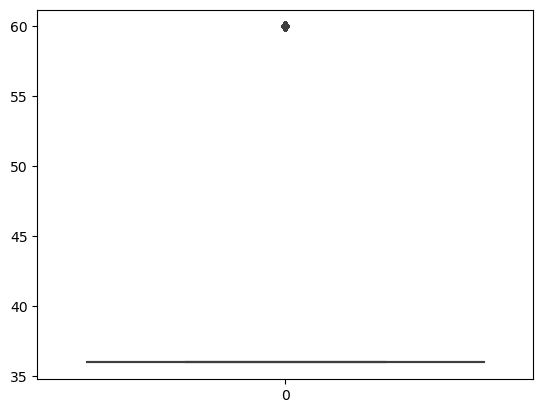

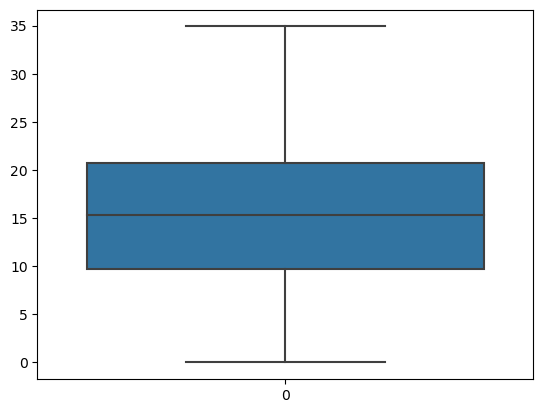

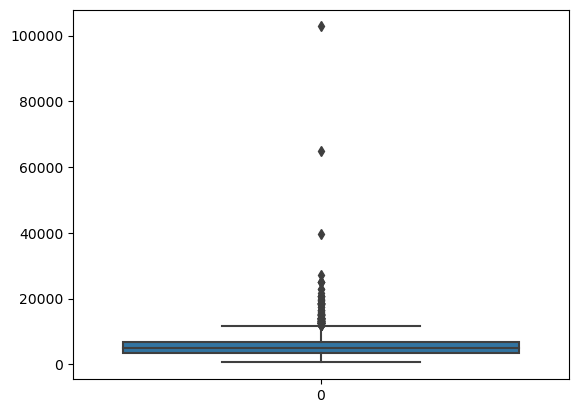

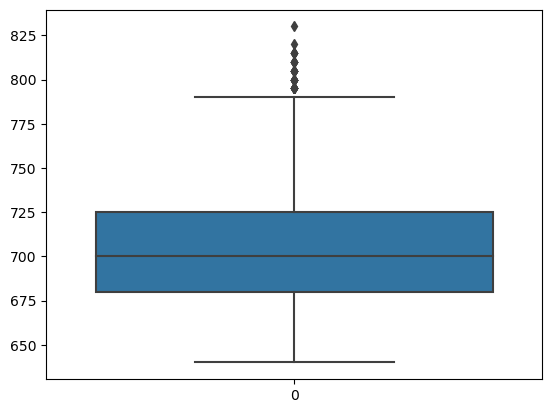

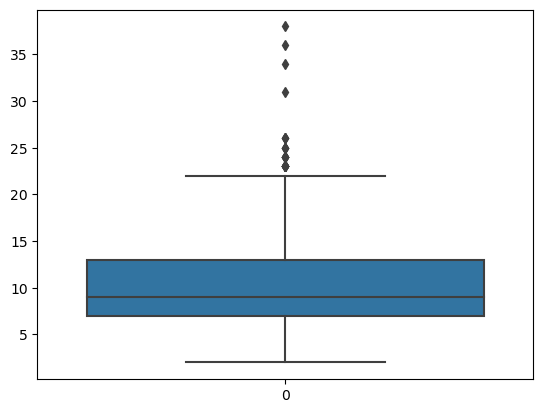

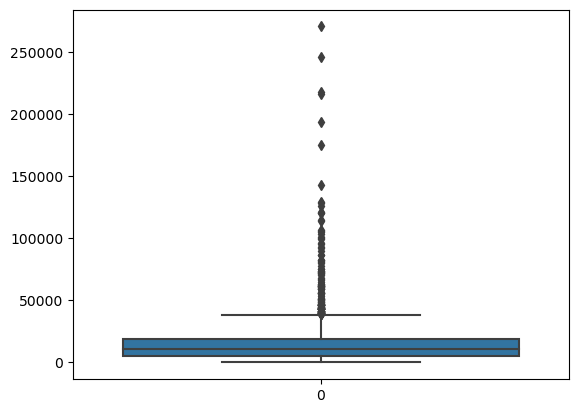

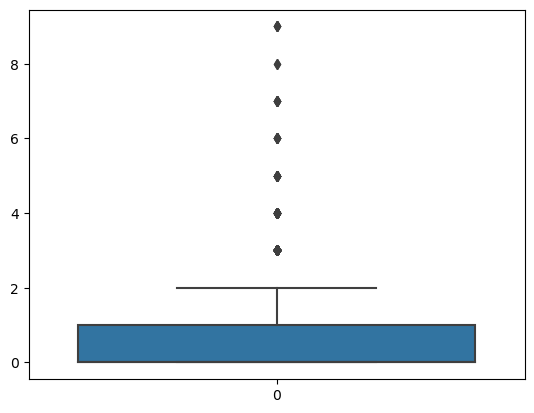

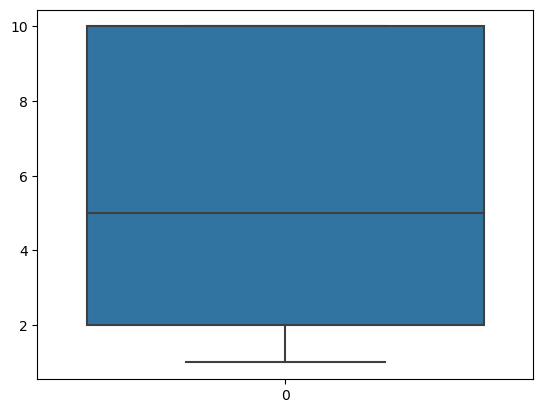

In [544]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

In [545]:
num_data.Inquiries_in_the_Last_6_Months.value_counts()

Inquiries_in_the_Last_6_Months
0.0    1252
1.0     657
2.0     335
3.0     169
4.0      50
5.0      14
6.0       8
7.0       7
9.0       5
8.0       2
Name: count, dtype: int64

In [546]:
l = ['Amount_Requested','Amount_Funded_By_Investors','Interest_rate','FICO_Range','Open_CREDIT_Lines','Inquiries_in_the_Last_6_Months']

In [547]:
num_data.apply(outliertreat_IQR)

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,-1248.0,-9000.0,-9000.0,1.70,36.0,-6.6375,-1450.0,612.5,-2.0,-14305.5,-1.5,-10.0
1,3748.0,31000.0,31000.0,24.26,36.0,37.0625,11750.0,792.5,22.0,38742.5,2.5,22.0


#### Amount Requested

In [548]:
num_data['Amount_Requested'] = num_data.Amount_Requested.clip(lower = -10500.00, upper = 33500)

<Axes: >

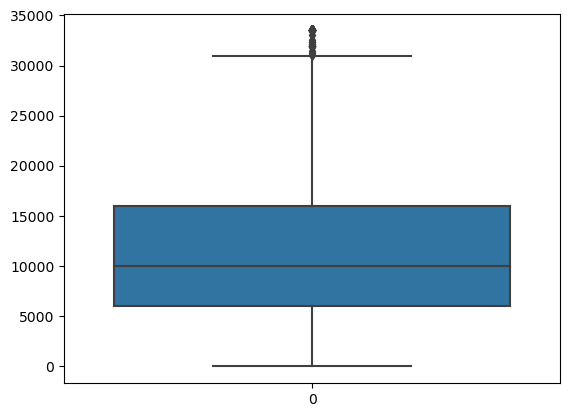

In [549]:
sns.boxplot(num_data.Amount_Requested)

#### Amount_Funded_By_Investors

<Axes: >

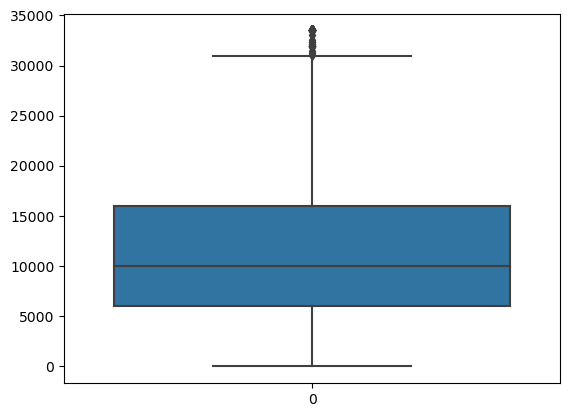

In [550]:
num_data['Amount_Funded_By_Investors'] = num_data.Amount_Funded_By_Investors.clip(lower = -9000, upper = 31000)
sns.boxplot(num_data.Amount_Requested)

#### Interest Rate

<Axes: >

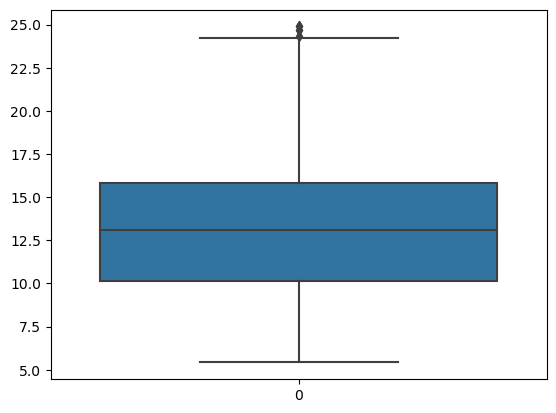

In [551]:
num_data['Interest Rate'] = num_data.Interest_Rate.clip(lower = 1.70, upper = 24.26)
sns.boxplot(num_data.Interest_Rate)

#### FICO_Range

<Axes: >

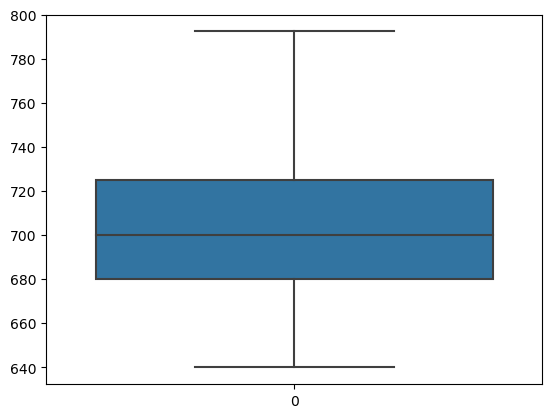

In [552]:
num_data['FICO_Range'] = num_data.FICO_Range.clip(lower = 612.5, upper = 792.5)
sns.boxplot(num_data.FICO_Range)

#### Open_CREDIT_Lines

<Axes: >

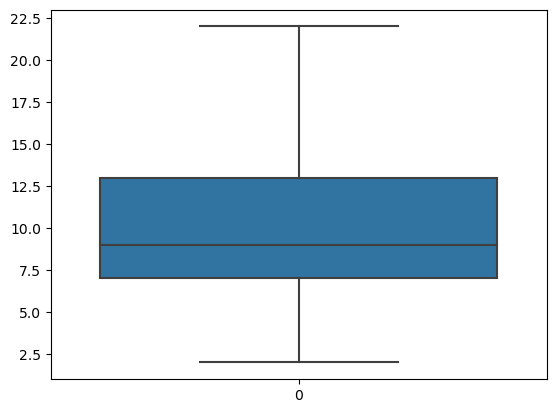

In [553]:
num_data['Open_CREDIT_Lines'] = num_data.Open_CREDIT_Lines.clip(lower = -2.0, upper = 22.0)
sns.boxplot(num_data.Open_CREDIT_Lines)

#### Inquiries_in_the_Last_6_Months

<Axes: >

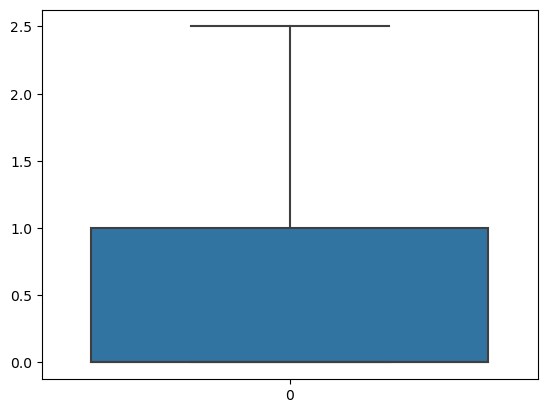

In [554]:
num_data['Inquiries_in_the_Last_6_Months'] = num_data.Inquiries_in_the_Last_6_Months.clip(lower = -1.5, upper = 2.5)
sns.boxplot(num_data.Inquiries_in_the_Last_6_Months)

In [555]:
num_data.head()

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest Rate
0,1,20000.0,20000.0,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0,8.90
1,2,19200.0,19200.0,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0,12.12
2,3,33500.0,31000.0,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0,21.98
3,4,9975.0,9975.0,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0,9.99
4,5,12000.0,12000.0,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0,11.71


## Merging the categorical and the numerical data to get the dataset

In [556]:
M_data1 = pd.merge(num_data,cat_data,how = 'inner',left_on = 'Loan_id',right_on = 'Loan_id')

In [557]:
M_data1.shape

(2499, 16)

In [558]:
M_data1.columns

Index(['Loan_id', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Debt_To_Income_Ratio',
       'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Interest Rate', 'Loan_Purpose', 'States',
       'Home_Ownership'],
      dtype='object')

In [559]:
M_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Loan_id                         2499 non-null   int64  
 1   Amount_Requested                2499 non-null   float64
 2   Amount_Funded_By_Investors      2499 non-null   float64
 3   Interest_Rate                   2499 non-null   float64
 4   Loan_Length                     2499 non-null   float64
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   Monthly_Income                  2499 non-null   float64
 7   FICO_Range                      2499 non-null   float64
 8   Open_CREDIT_Lines               2499 non-null   float64
 9   Revolving_CREDIT_Balance        2499 non-null   float64
 10  Inquiries_in_the_Last_6_Months  2499 non-null   float64
 11  Employment_Length               2499 non-null   float64
 12  Interest Rate                   24

## Standardisation of the numerical data

In [560]:
from scipy import stats

In [561]:
num_data_z = num_data.apply(stats.zscore) 

In [562]:
num_data.head()

,Loan_id,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest Rate
0,1,20000.0,20000.0,8.90,36.0,14.90,6541.67,735.0,14.0,14272.0,2.0,1.0,8.90
1,2,19200.0,19200.0,12.12,36.0,28.36,4583.33,715.0,12.0,11140.0,1.0,2.0,12.12
2,3,33500.0,31000.0,21.98,60.0,23.81,11500.00,690.0,14.0,21977.0,1.0,2.0,21.98
3,4,9975.0,9975.0,9.99,36.0,14.30,3833.33,695.0,10.0,9346.0,0.0,5.0,9.99
4,5,12000.0,12000.0,11.71,36.0,18.78,3195.00,695.0,11.0,14469.0,0.0,9.0,11.71
